# Exploratory Analysis of Exam Test Score Data

The dataset analysed is available at Kaggle via: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams  
This notebook is intended to demonstrate initial exploration of a simple data set, some plotting and graphical analysis, and lead into a deeper dive in a separate future notebook.

All analysis is performed using Python.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the data set into a pandas DataFrame
data = pd.read_csv("data//exams.csv")

In [3]:
#Quick visual inspection of the data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
#Key data statistics
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
#Rename some columns to easier to use names 
data.rename(columns={'race/ethnicity':'race',
                    'parental level of education':'parent_education',
                    'test preparation course':'test_prep'},inplace=True)

#visual inspection of changes
data.head()

,gender,race,parent_education,lunch,test_prep,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [6]:
#For Loop to produce groupby means for the different categorical elements
for i in data.columns[0:5]:
    globals()['Data_mean_%s' % i] = data.groupby(by=i).mean()

In [7]:
#Print the new average scores in tabular form
print(Data_mean_gender)
print(Data_mean_race)
print(Data_mean_parent_education)
print(Data_mean_lunch)
print(Data_mean_test_prep)

        math score  reading score  writing score
gender                                          
female   63.196687      71.888199      71.708075
male     69.384913      66.305609      64.029014
         math score  reading score  writing score
race                                             
group A   65.215190      68.556962      66.974684
group B   63.170732      67.102439      65.736585
group C   63.130031      66.383901      64.523220
group D   69.267176      72.087786      72.259542
group E   74.465649      72.526718      70.213740
                    math score  reading score  writing score
parent_education                                            
associate's degree   69.536946      70.985222      70.113300
bachelor's degree    71.491071      74.008929      74.410714
high school          65.207921      67.400990      64.846535
master's degree      71.585714      75.428571      75.885714
some college         65.297297      68.045045      66.734234
some high school     60.701

In [8]:
#For Loop to produce groupby means for the different categorical elements
for i in data.columns[0:5]:
    globals()['Data_count_%s' % i] = data.groupby(by=i).count()

In [9]:
#Print the observations in each category in tabular form
print(Data_count_gender['math score'])
print('------')
print(Data_count_race['math score'])
print('------')
print(Data_count_parent_education['math score'])
print('------')
print(Data_count_lunch['math score'])
print('------')
print(Data_count_test_prep['math score'])

gender
female    483
male      517
Name: math score, dtype: int64
------
race
group A     79
group B    205
group C    323
group D    262
group E    131
Name: math score, dtype: int64
------
parent_education
associate's degree    203
bachelor's degree     112
high school           202
master's degree        70
some college          222
some high school      191
Name: math score, dtype: int64
------
lunch
free/reduced    348
standard        652
Name: math score, dtype: int64
------
test_prep
completed    335
none         665
Name: math score, dtype: int64


## Distribution Plots

Text(0.5, 1.0, 'Writing Score by Test Prep')

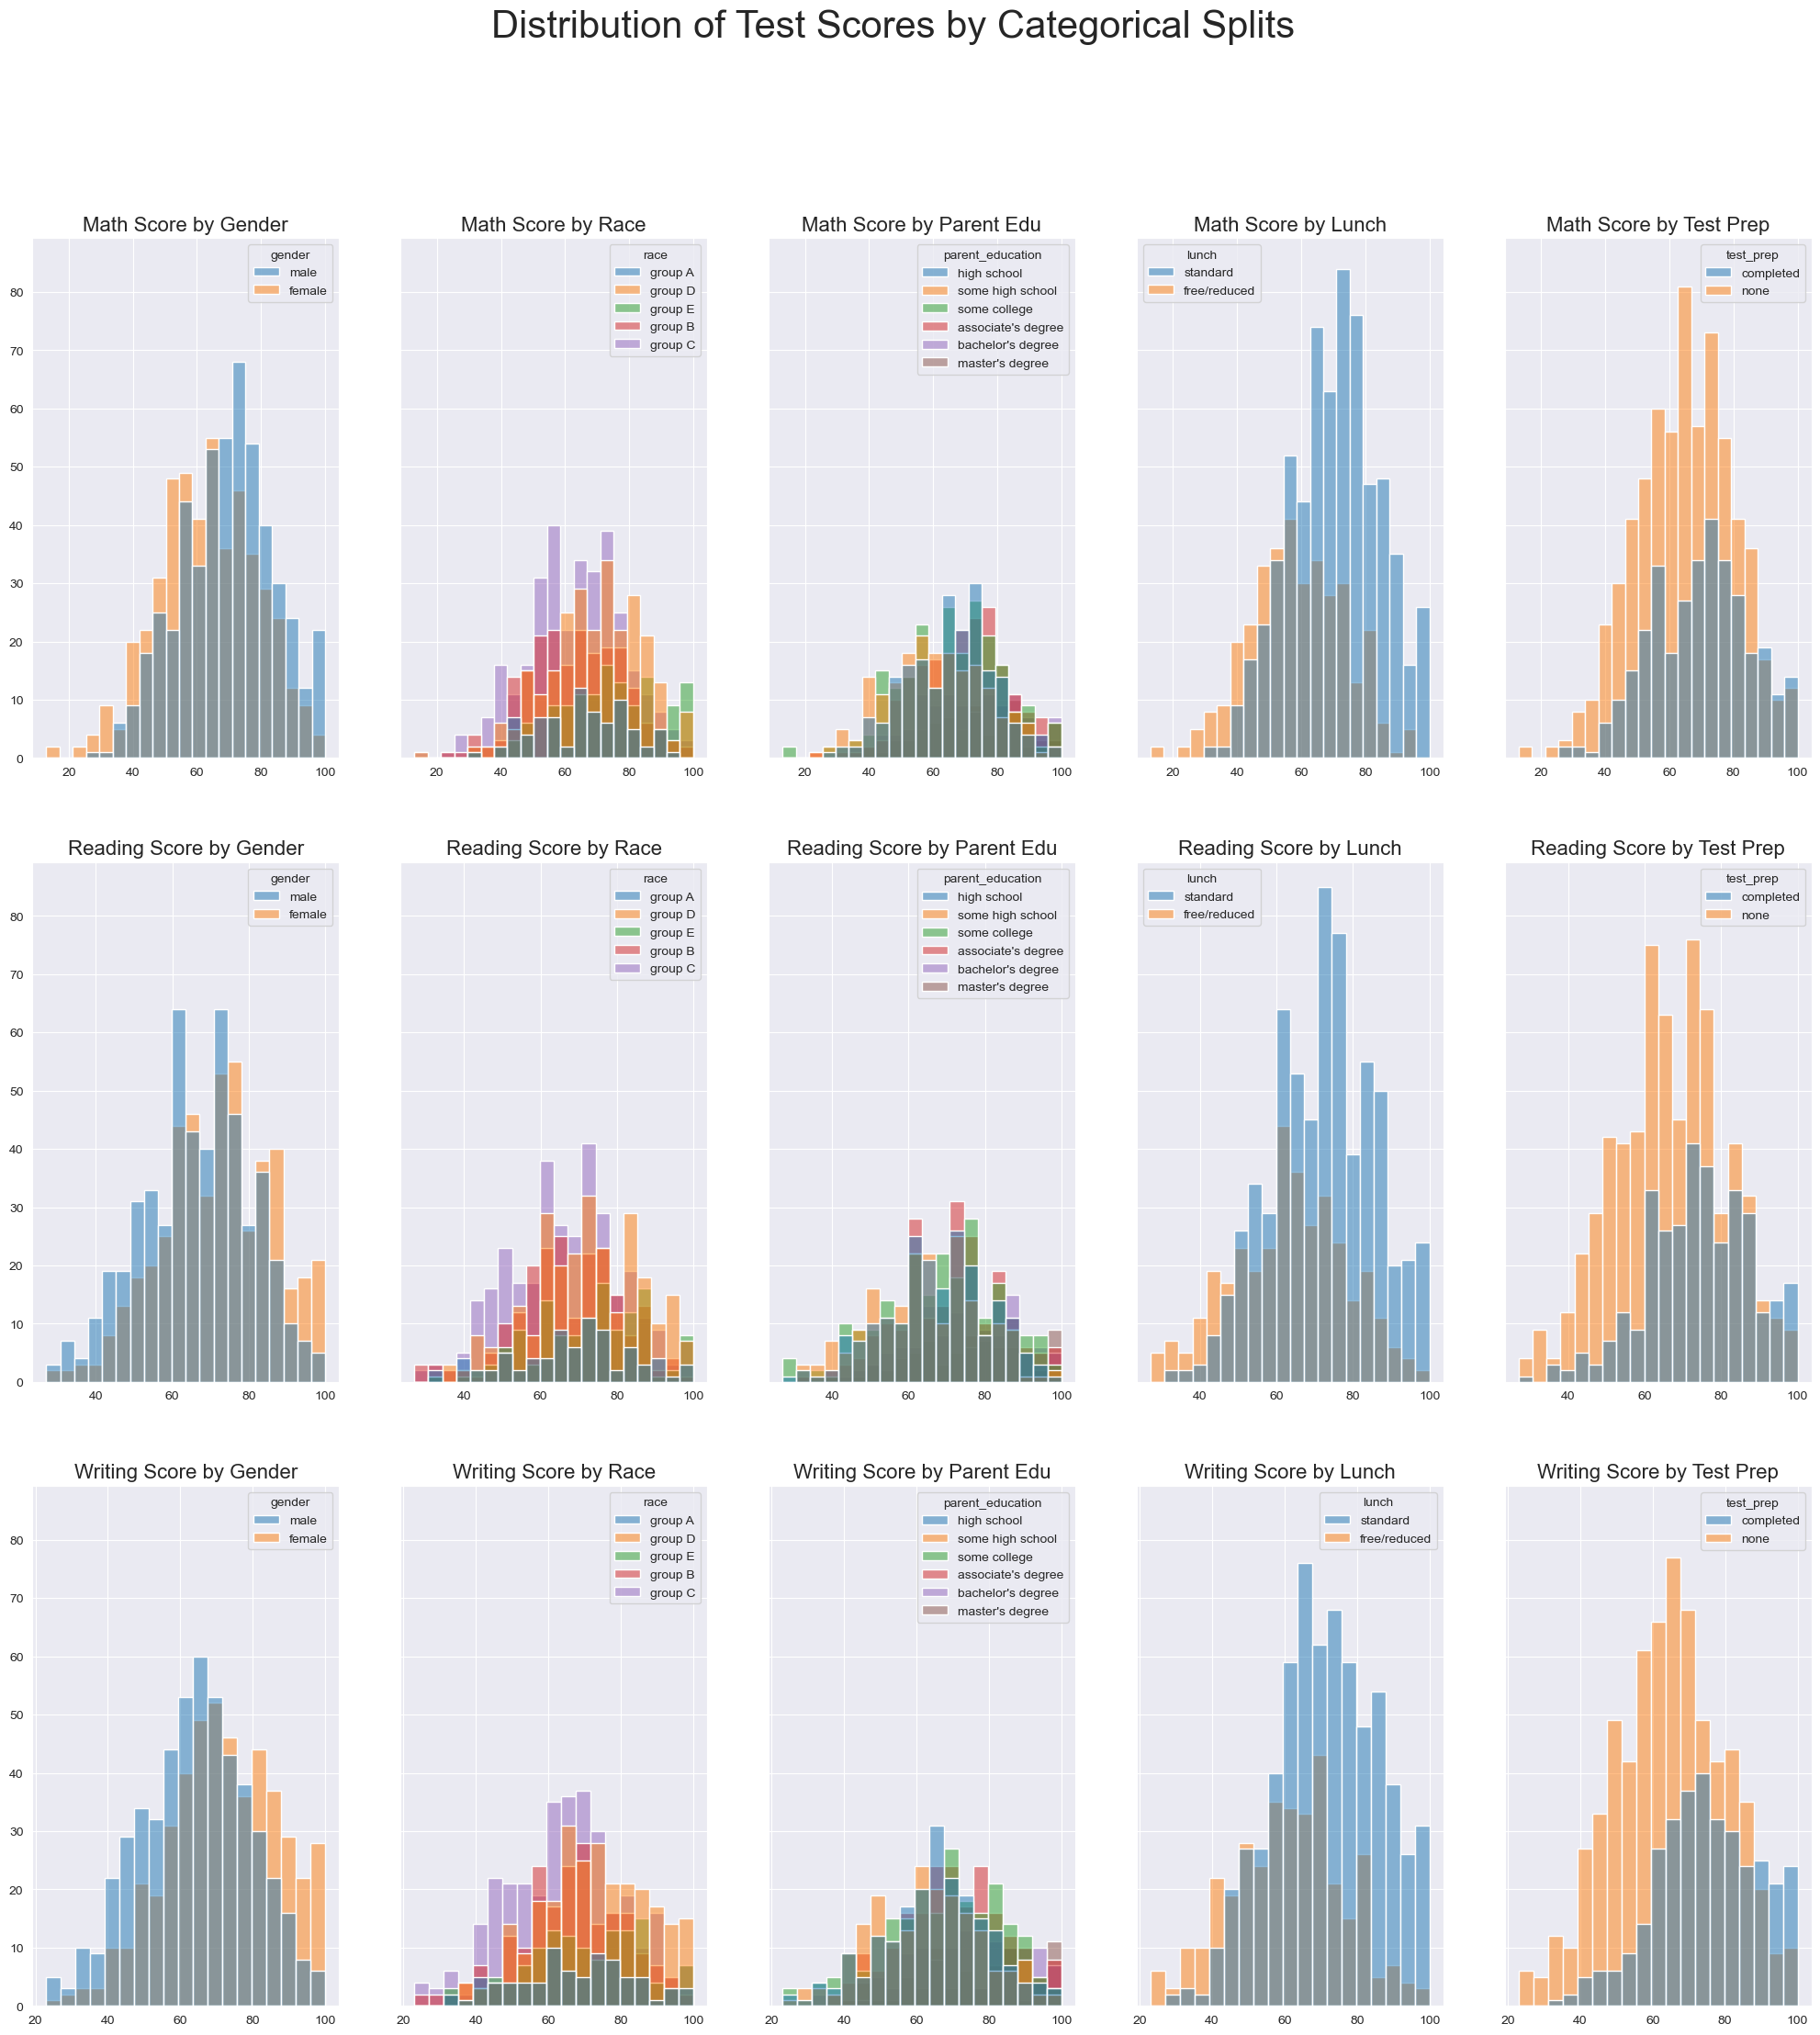

In [10]:
#Set DarkGrid style for easier viewing
sns.set_style("darkgrid")

fig, axes = plt.subplots(3, 5, figsize=(25, 25), sharey=True)
fig.suptitle('Distribution of Test Scores by Categorical Splits', size=30)


## DISTRIBUTION PLOTS FOR MATH SCORE
#Distribution Math score by Gender
sns.histplot(ax = axes[0,0],
            data = data,
            x='math score', 
            hue='gender')
axes[0,0].set(xlabel=None)
axes[0,0].set(ylabel=None)
axes[0,0].set_title('Math Score by Gender',size=16)

#Distribution Math score by Race
sns.histplot(ax = axes[0,1],
            data = data,
            x='math score', 
            hue='race')
axes[0,1].set(xlabel=None)
axes[0,1].set(ylabel=None)
axes[0,1].set_title('Math Score by Race',size=16)

#Distribution Math score by Parent Education Level
sns.histplot(ax = axes[0,2],
            data = data,
            x='math score', 
            hue='parent_education')
axes[0,2].set(xlabel=None)
axes[0,2].set(ylabel=None)
axes[0,2].set_title('Math Score by Parent Edu',size=16)

#Distribution Math score by Lunch
sns.histplot(ax = axes[0,3],
            data = data,
            x='math score', 
            hue='lunch')
axes[0,3].set(xlabel=None)
axes[0,3].set(ylabel=None)
axes[0,3].set_title('Math Score by Lunch',size=16)

#Distribution Math score by Test Preparation
sns.histplot(ax = axes[0,4],
            data = data,
            x='math score', 
            hue='test_prep')
axes[0,4].set(xlabel=None)
axes[0,4].set(ylabel=None)
axes[0,4].set_title('Math Score by Test Prep',size=16)


## DISTRIBUTION PLOTS FOR READING SCORE
#Distribution Reading score by Gender
sns.histplot(ax = axes[1,0],
            data = data,
            x='reading score', 
            hue='gender')
axes[1,0].set(xlabel=None)
axes[1,0].set(ylabel=None)
axes[1,0].set_title('Reading Score by Gender',size=16)

#Distribution reading score by Race
sns.histplot(ax = axes[1,1],
            data = data,
            x='reading score', 
            hue='race')
axes[1,1].set(xlabel=None)
axes[1,1].set(ylabel=None)
axes[1,1].set_title('Reading Score by Race',size=16)

#Distribution reading score by Parent Education Level
sns.histplot(ax = axes[1,2],
            data = data,
            x='reading score', 
            hue='parent_education')
axes[1,2].set(xlabel=None)
axes[1,2].set(ylabel=None)
axes[1,2].set_title('Reading Score by Parent Edu',size=16)

#Distribution reading score by Lunch
sns.histplot(ax = axes[1,3],
            data = data,
            x='reading score', 
            hue='lunch')
axes[1,3].set(xlabel=None)
axes[1,3].set(ylabel=None)
axes[1,3].set_title('Reading Score by Lunch',size=16)

#Distribution reading score by Test Preparation
sns.histplot(ax = axes[1,4],
            data = data,
            x='reading score', 
            hue='test_prep')
axes[1,4].set(xlabel=None)
axes[1,4].set(ylabel=None)
axes[1,4].set_title('Reading Score by Test Prep',size=16)


## DISTRIBUTION PLOTS FOR WRITING SCORE
#Distribution Writing score by Gender
sns.histplot(ax = axes[2,0],
            data = data,
            x='writing score', 
            hue='gender')
axes[2,0].set(xlabel=None)
axes[2,0].set(ylabel=None)
axes[2,0].set_title('Writing Score by Gender',size=16)

#Distribution writing score by Race
sns.histplot(ax = axes[2,1],
            data = data,
            x='writing score', 
            hue='race')
axes[2,1].set(xlabel=None)
axes[2,1].set(ylabel=None)
axes[2,1].set_title('Writing Score by Race',size=16)

#Distribution writing score by Parent Education Level
sns.histplot(ax = axes[2,2],
            data = data,
            x='writing score', 
            hue='parent_education')
axes[2,2].set(xlabel=None)
axes[2,2].set(ylabel=None)
axes[2,2].set_title('Writing Score by Parent Edu',size=16)

#Distribution writing score by Lunch
sns.histplot(ax = axes[2,3],
            data = data,
            x='writing score', 
            hue='lunch')
axes[2,3].set(xlabel=None)
axes[2,3].set(ylabel=None)
axes[2,3].set_title('Writing Score by Lunch',size=16)

#Distribution writing score by Test Preparation
sns.histplot(ax = axes[2,4],
            data = data,
            x='writing score', 
            hue='test_prep')
axes[2,4].set(xlabel=None)
axes[2,4].set(ylabel=None)
axes[2,4].set_title('Writing Score by Test Prep',size=16)

## Box Plots split by categories

Text(0.5, 1.0, 'Writing Score by Test Prep')

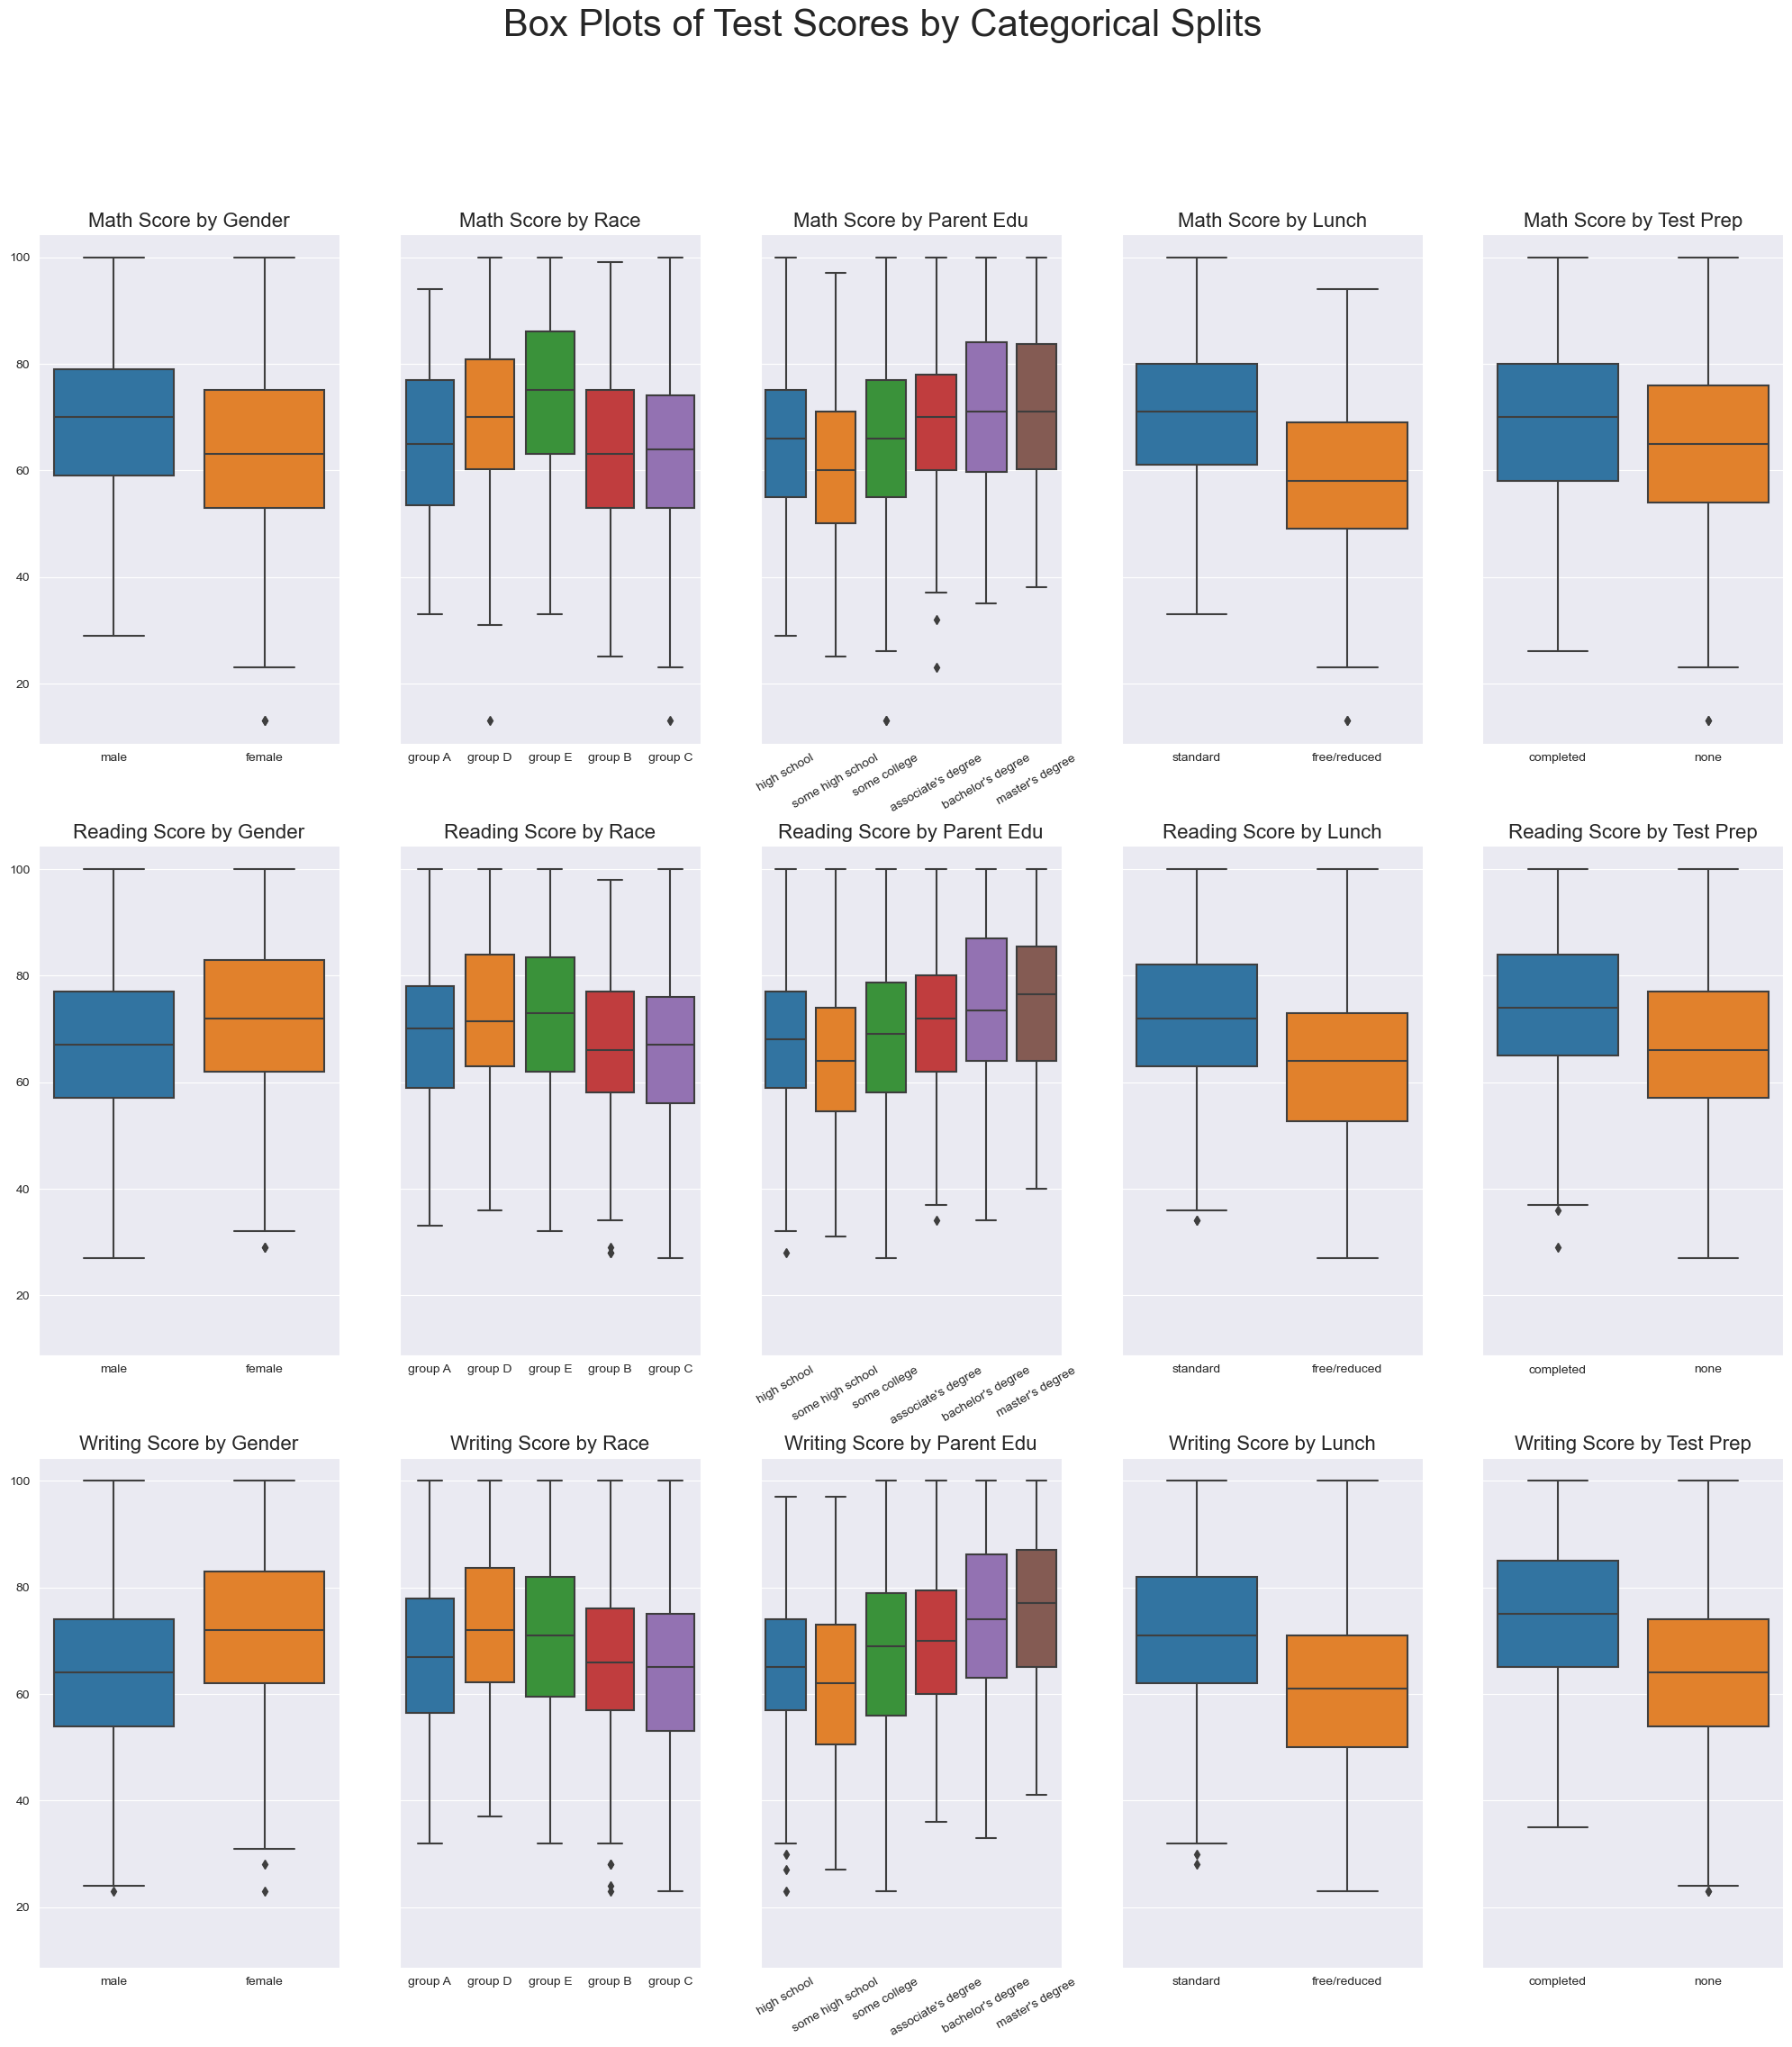

In [11]:
#Set DarkGrid style for easier viewing
sns.set_style("darkgrid")

fig, axes = plt.subplots(3, 5, figsize=(25, 25), sharey=True)
fig.suptitle('Box Plots of Test Scores by Categorical Splits', size=30)

## BOX PLOTS OF MATH SCORE
# Box plot Math Score by Gender
sns.boxplot(ax = axes[0,0],
            x = 'gender',
            y = 'math score',
            data = data)
axes[0,0].set(xlabel=None)
axes[0,0].set(ylabel=None)
axes[0,0].set_title('Math Score by Gender',size=16)

# Box plot Math Score by Race
sns.boxplot(ax = axes[0,1],
            x = 'race',
            y = 'math score',
            data = data)
axes[0,1].set(xlabel=None)
axes[0,1].set(ylabel=None)
axes[0,1].set_title('Math Score by Race',size=16)

# Box plot Math Score by Parent Education Level
##Change Rotation of xticks on this plot
sns.boxplot(ax = axes[0,2],
            x = 'parent_education',
            y = 'math score',
            data = data)
axes[0,2].set(xlabel=None)
axes[0,2].set(ylabel=None)
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=30)
axes[0,2].set_title('Math Score by Parent Edu',size=16)

# Box plot Math Score by Lunch
sns.boxplot(ax = axes[0,3],
            x = 'lunch',
            y = 'math score',
            data = data)
axes[0,3].set(xlabel=None)
axes[0,3].set(ylabel=None)
axes[0,3].set_title('Math Score by Lunch',size=16)

# Box plot Math Score by Test Preparation
sns.boxplot(ax = axes[0,4],
            x = 'test_prep',
            y = 'math score',
            data = data)
axes[0,4].set(xlabel=None)
axes[0,4].set(ylabel=None)
axes[0,4].set_title('Math Score by Test Prep',size=16)




## BOX PLOTS OF READING SCORE
# Box plot Reading Score by Gender
sns.boxplot(ax = axes[1,0],
            x = 'gender',
            y = 'reading score',
            data = data)
axes[1,0].set(xlabel=None)
axes[1,0].set(ylabel=None)
axes[1,0].set_title('Reading Score by Gender',size=16)

# Box plot Reading Score by Race
sns.boxplot(ax = axes[1,1],
            x = 'race',
            y = 'reading score',
            data = data)
axes[1,1].set(xlabel=None)
axes[1,1].set(ylabel=None)
axes[1,1].set_title('Reading Score by Race',size=16)

# Box plot Reading Score by Parent Education Level
##Change Rotation of xticks on this plot
sns.boxplot(ax = axes[1,2],
            x = 'parent_education',
            y = 'reading score',
            data = data)
axes[1,2].set(xlabel=None)
axes[1,2].set(ylabel=None)
axes[1,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=30)
axes[1,2].set_title('Reading Score by Parent Edu',size=16)

# Box plot Reading Score by Lunch
sns.boxplot(ax = axes[1,3],
            x = 'lunch',
            y = 'reading score',
            data = data)
axes[1,3].set(xlabel=None)
axes[1,3].set(ylabel=None)
axes[1,3].set_title('Reading Score by Lunch',size=16)

# Box plot Reading Score by Test Preparation
sns.boxplot(ax = axes[1,4],
            x = 'test_prep',
            y = 'reading score',
            data = data)
axes[1,4].set(xlabel=None)
axes[1,4].set(ylabel=None)
axes[1,4].set_title('Reading Score by Test Prep',size=16)




## BOX PLOTS OF WRITING SCORE
# Box plot Writing Score by Gender
sns.boxplot(ax = axes[2,0],
            x = 'gender',
            y = 'writing score',
            data = data)
axes[2,0].set(xlabel=None)
axes[2,0].set(ylabel=None)
axes[2,0].set_title('Writing Score by Gender',size=16)

# Box plot Writing Score by Race
sns.boxplot(ax = axes[2,1],
            x = 'race',
            y = 'writing score',
            data = data)
axes[2,1].set(xlabel=None)
axes[2,1].set(ylabel=None)
axes[2,1].set_title('Writing Score by Race',size=16)

# Box plot Writing Score by Parent Education Level
sns.boxplot(ax = axes[2,2],
            x = 'parent_education',
            y = 'writing score',
            data = data)
axes[2,2].set(xlabel=None)
axes[2,2].set(ylabel=None)
axes[2,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=30)
axes[2,2].set_title('Writing Score by Parent Edu',size=16)

# Box plot Writing Score by Lunch
sns.boxplot(ax = axes[2,3],
            x = 'lunch',
            y = 'writing score',
            data = data)
axes[2,3].set(xlabel=None)
axes[2,3].set(ylabel=None)
axes[2,3].set_title('Writing Score by Lunch',size=16)

# Box plot Writing Score by Test Preparation
sns.boxplot(ax = axes[2,4],
            x = 'test_prep',
            y = 'writing score',
            data = data)
axes[2,4].set(xlabel=None)
axes[2,4].set(ylabel=None)
axes[2,4].set_title('Writing Score by Test Prep',size=16)


Did one Group do more Test Preparation than another?


In [12]:
## Produce bar plots of these
data[['gender','test_prep']].groupby(by='gender').count()

#data[['race','test_prep']].groupby(by='race').count()

,test_prep
gender,
female,483
male,517


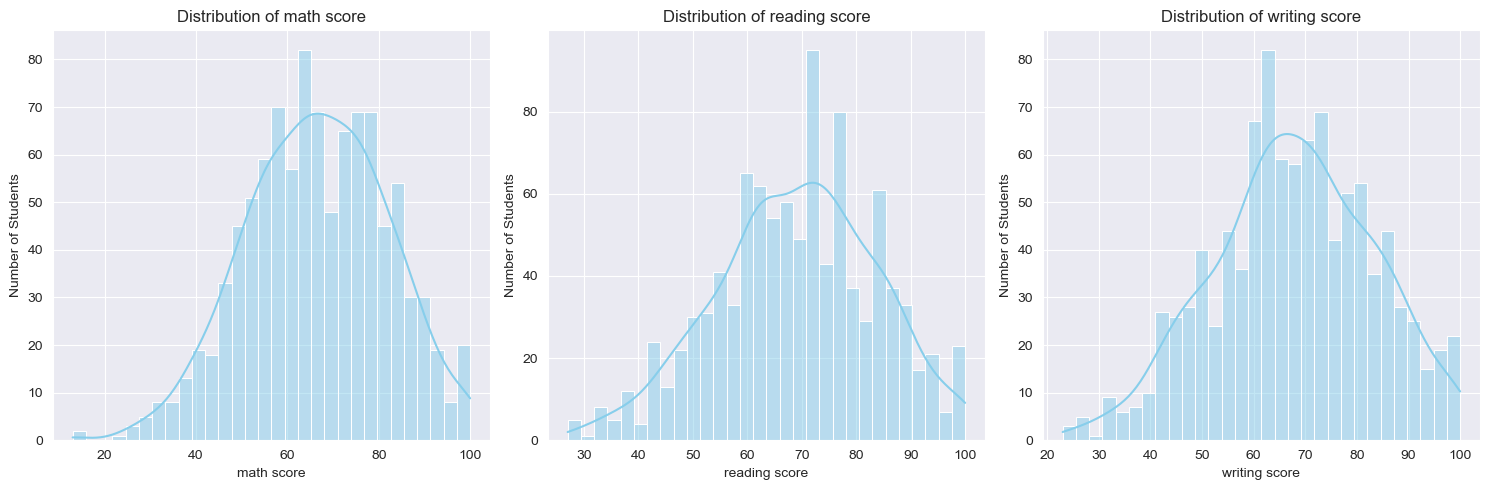

In [13]:
# Plotting the distribution of scores for the three subjects
plt.figure(figsize=(15, 5))

for i, subject in enumerate(['math score', 'reading score', 'writing score'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[subject], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {subject}')
    plt.xlabel(subject)
    plt.ylabel('Number of Students')

plt.tight_layout()
plt.show()

### Distributions of Exam Scores

From the plots above, we can observe the following:

1. **Math Score**: The distribution is approximately bell-shaped, though with some minor irregularities. The majority of students score between 60 and 80.
2. **Reading Score**: This distribution is slightly left-skewed, indicating that a larger number of students score on the higher end of the scale.
3. **Writing Score**: Similar to the reading score distribution, it's slightly left-skewed. Most students score between 60 and 80.

Next, let's analyze how the scores vary with respect to different categorical variables in the dataset. We'll start by examining the influence of gender on the scores.

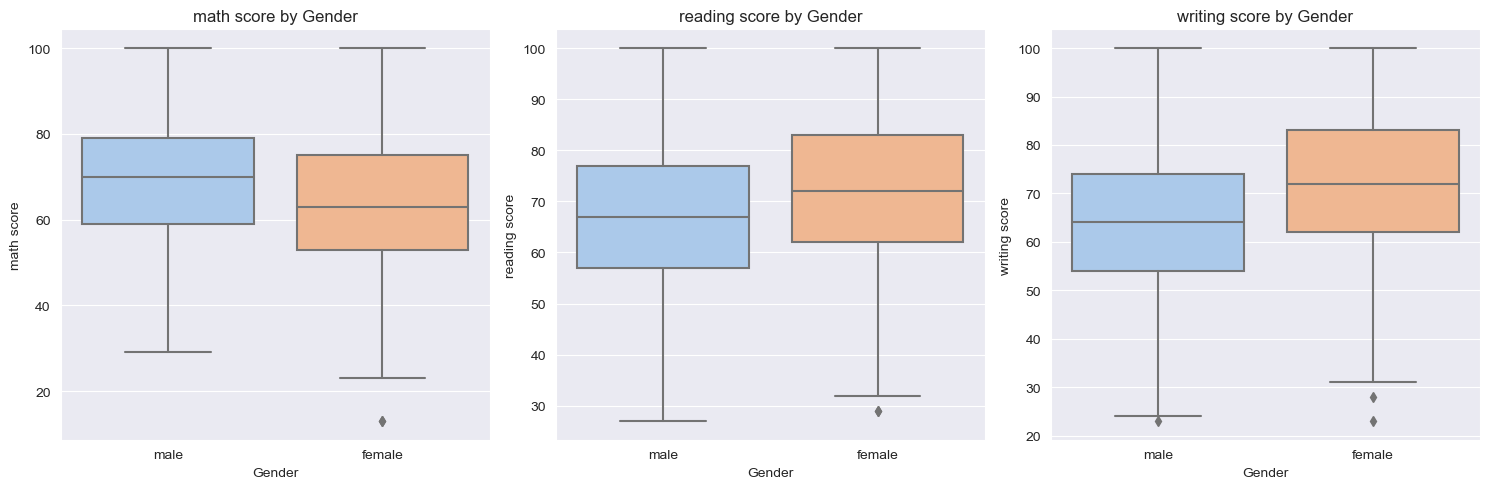

In [14]:
# Plotting the scores based on gender
plt.figure(figsize=(15, 5))

for i, subject in enumerate(['math score', 'reading score', 'writing score'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data['gender'], y=data[subject], palette="pastel")
    plt.title(f'{subject} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(subject)

plt.tight_layout()
plt.show()

### Exam Scores by Gender

From the boxplots above, we can infer the following about the influence of gender on exam scores:

1. **Math Score**: Male students have a slightly higher median score in math than female students. The spread of scores for males is also slightly more variable.
2. **Reading Score**: Female students outperform male students in reading. The median score for females is higher, and the interquartile range (middle 50% of scores) for females is situated at a higher score range than for males.
3. **Writing Score**: Similar to reading scores, female students have a higher median in writing scores. The spread for females is also higher than for males.

Next, let's examine the scores based on race/ethnicity.

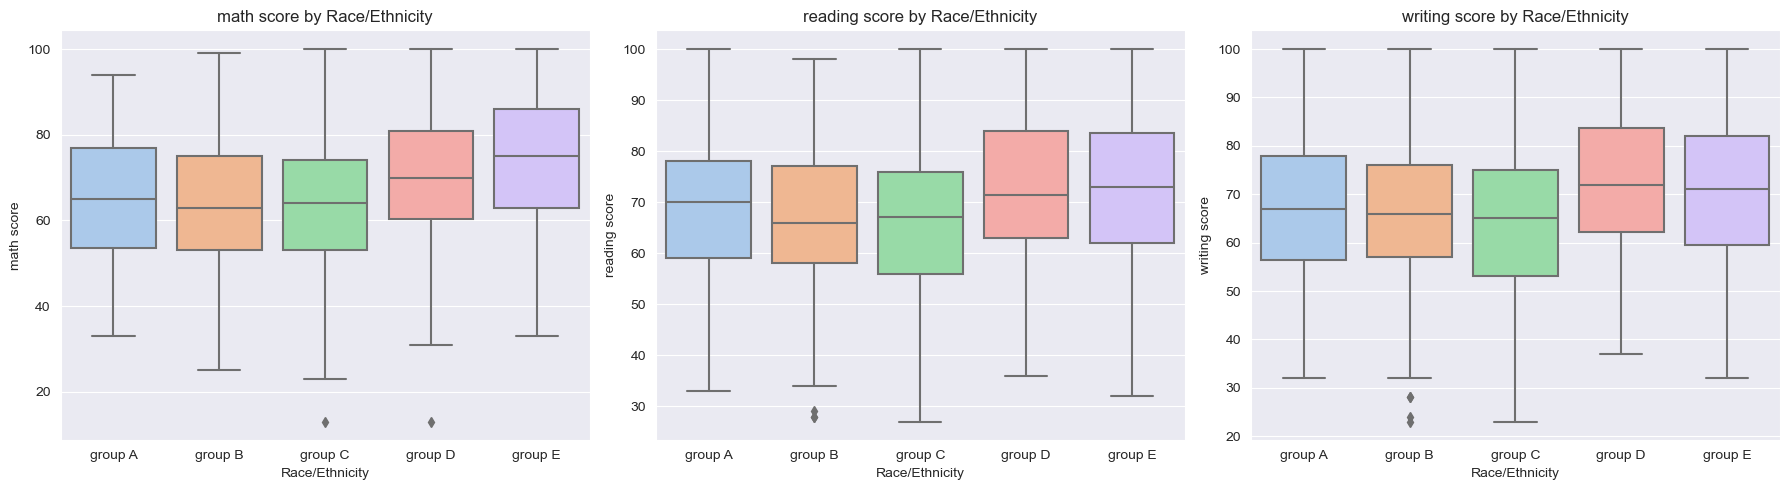

In [17]:
# Plotting the scores based on race/ethnicity
plt.figure(figsize=(18, 5))

for i, subject in enumerate(['math score', 'reading score', 'writing score'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data['race'], y=data[subject], palette="pastel", order=sorted(data['race'].unique()))
    plt.title(f'{subject} by Race/Ethnicity')
    plt.xlabel('Race/Ethnicity')
    plt.ylabel(subject)

plt.tight_layout()
plt.show()


### Exam Scores by Race/Ethnicity

From the boxplots, we can make the following observations regarding exam scores across different race/ethnicity groups:

1. **Math Score**: 
    - Group E has the highest median score, followed closely by Group D.
    - Groups A and B have the lowest median scores with Group A having the widest spread.
  
2. **Reading Score**: 
    - Group E has the highest median score, but Group C and Group D also have competitive scores.
    - Group A again has the lowest median score, but its spread is more condensed than in math scores.

3. **Writing Score**: 
    - Group E leads with the highest median, followed by Group D.
    - Groups A and B have the lowest medians, with Group A having a slightly lower median than Group B.

The patterns observed suggest that Group E tends to perform better across all subjects, while Group A has room for improvement. However, it's essential to avoid making generalizations or assumptions based on race/ethnicity without a deeper understanding of underlying factors.

Next, we'll explore how parental level of education influences exam scores.

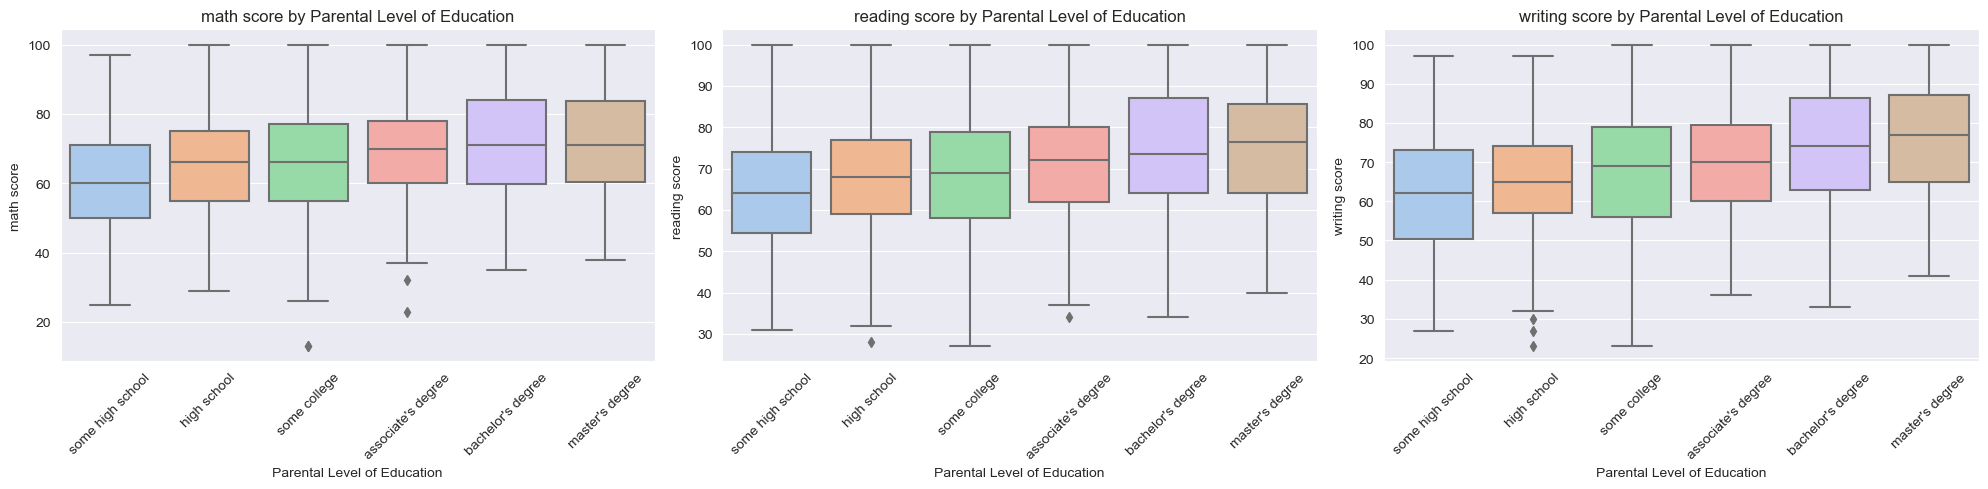

In [19]:
# Plotting the scores based on parental level of education
plt.figure(figsize=(20, 5))

education_order = [
    'some high school', 'high school', 
    'some college', "associate's degree", 
    "bachelor's degree", "master's degree"
]

for i, subject in enumerate(['math score', 'reading score', 'writing score'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data['parent_education'], y=data[subject], palette="pastel", order=education_order)
    plt.title(f'{subject} by Parental Level of Education')
    plt.xlabel('Parental Level of Education')
    plt.ylabel(subject)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Exam Scores by Parental Level of Education

From the boxplots based on parental education levels, we can infer:

1. **Math Score**: 
    - Students with parents holding a master's degree have the highest median score.
    - Students whose parents only completed some high school education have the lowest median.
  
2. **Reading Score**: 
    - Here too, students with parents having a master's degree lead with the highest median score. 
    - Again, those with parents who completed only some high school have the lowest median score.

3. **Writing Score**: 
    - Similar patterns persist with students whose parents have a master's degree having the highest median score.
    - Students with parents who finished only some high school or high school have the lowest medians.

In general, there seems to be a trend where students whose parents have higher educational qualifications tend to perform better in exams. However, it's crucial to understand that correlation doesn't imply causation, and multiple factors could influence a student's performance.

Let's continue our exploration by examining how the type of lunch and test preparation course affects exam scores. We'll start with lunch type.

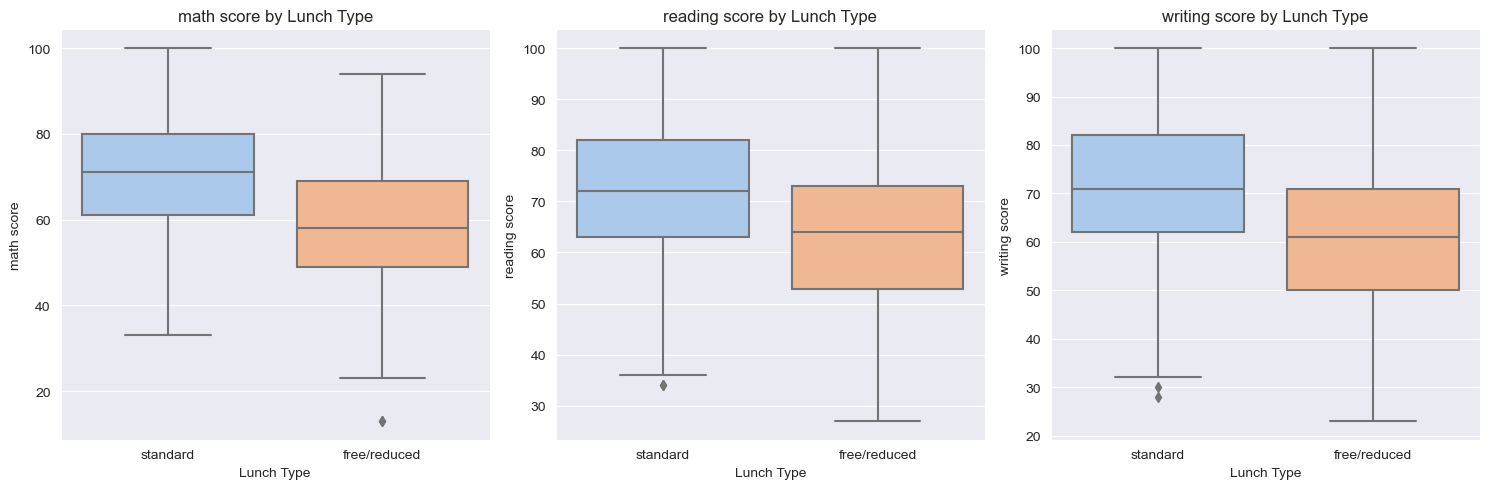

In [20]:
# Plotting the scores based on lunch type
plt.figure(figsize=(15, 5))

for i, subject in enumerate(['math score', 'reading score', 'writing score'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data['lunch'], y=data[subject], palette="pastel")
    plt.title(f'{subject} by Lunch Type')
    plt.xlabel('Lunch Type')
    plt.ylabel(subject)

plt.tight_layout()
plt.show()

### Exam Scores by Lunch Type

From the boxplots based on lunch type, we can observe:

1. **Math Score**: 
    - Students with standard lunch have a higher median score compared to those with free/reduced lunch.
  
2. **Reading Score**: 
    - Again, the median score for students with standard lunch is higher than that for students with free/reduced lunch.
  
3. **Writing Score**: 
    - The pattern persists with students having standard lunch scoring higher on average.

These patterns suggest that students with standard lunch tend to perform better across all subjects compared to those with free/reduced lunch. It's possible that the type of lunch is an indicator of other underlying socioeconomic factors that might influence academic performance.

Lastly, let's examine how completing a test preparation course affects exam scores.

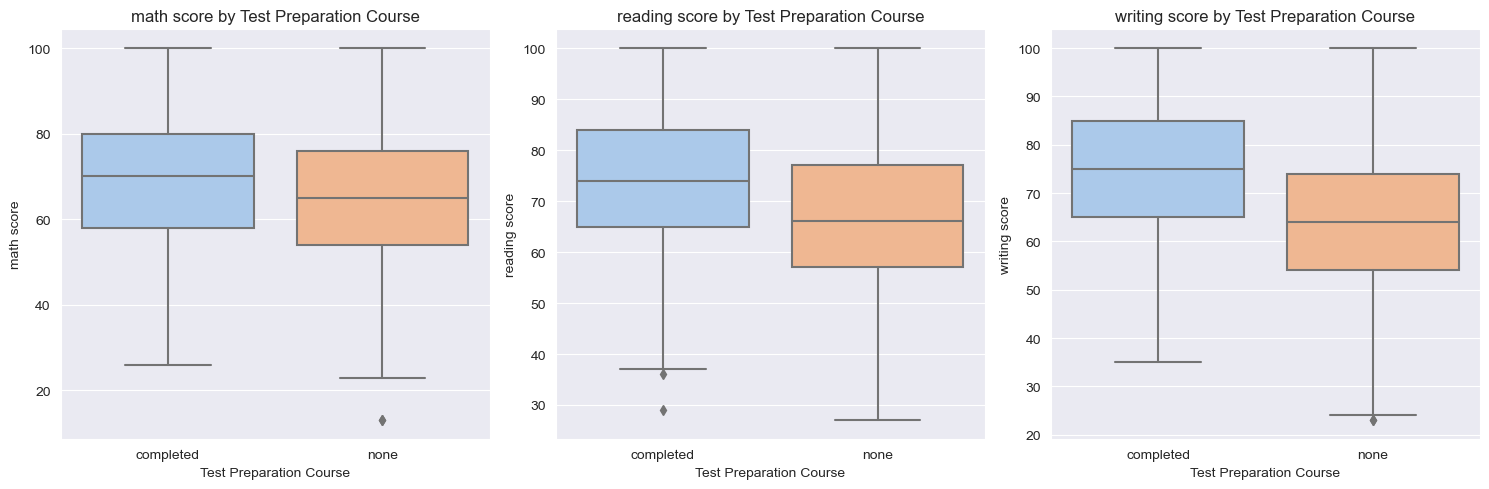

In [21]:
# Plotting the scores based on test preparation course
plt.figure(figsize=(15, 5))

for i, subject in enumerate(['math score', 'reading score', 'writing score'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data['test_prep'], y=data[subject], palette="pastel")
    plt.title(f'{subject} by Test Preparation Course')
    plt.xlabel('Test Preparation Course')
    plt.ylabel(subject)

plt.tight_layout()
plt.show()


### Exam Scores by Test Preparation Course

From the boxplots based on the completion of a test preparation course, we can deduce:

1. **Math Score**: 
    - Students who completed the test preparation course have a higher median score than those who didn't.
  
2. **Reading Score**: 
    - Again, students who completed the course perform better, as evidenced by the higher median score.
  
3. **Writing Score**: 
    - The pattern remains consistent, with students who took the course scoring higher on average.

Clearly, completing the test preparation course has a positive impact on exam scores across all subjects. This could be attributed to the extra preparation and practice that students get from the course.

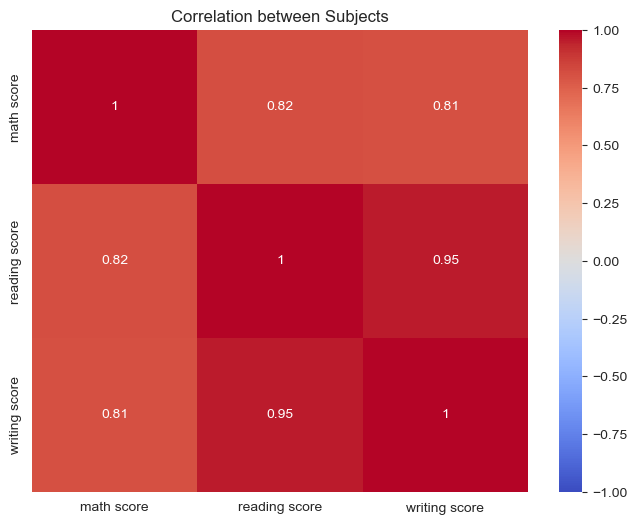

In [23]:
# Correlation Analysis
correlation_matrix = data[['math score', 'reading score', 'writing score']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between Subjects")
plt.show()

## Correlation Analysis

From the heatmap, we observe:

- There is a strong positive correlation between all three subjects. This indicates that students who perform well in one subject are likely to perform well in the others.
- Reading and writing scores have the highest correlation, suggesting that the skills required for these two subjects might overlap the most.

Next, we'll move to feature engineering and create a new feature representing the average score of the three subjects for each student.

In [24]:
# Feature Engineering: Creating a new 'average score' column
data['average score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

# Displaying the first few rows with the new column
data[['math score', 'reading score', 'writing score', 'average score']].head()


,math score,reading score,writing score,average score
0,67,67,63,65.666667
1,40,59,55,51.333333
2,59,60,50,56.333333
3,77,78,68,74.333333
4,78,73,68,73.000000


The 'average score' column has been successfully added, representing the mean score of the three subjects for each student.

Next, let's perform a grouped analysis to see if there's a combined effect of gender and race/ethnicity on the average scores. This will help us understand if certain combinations of gender and race/ethnicity demonstrate distinct performance patterns.


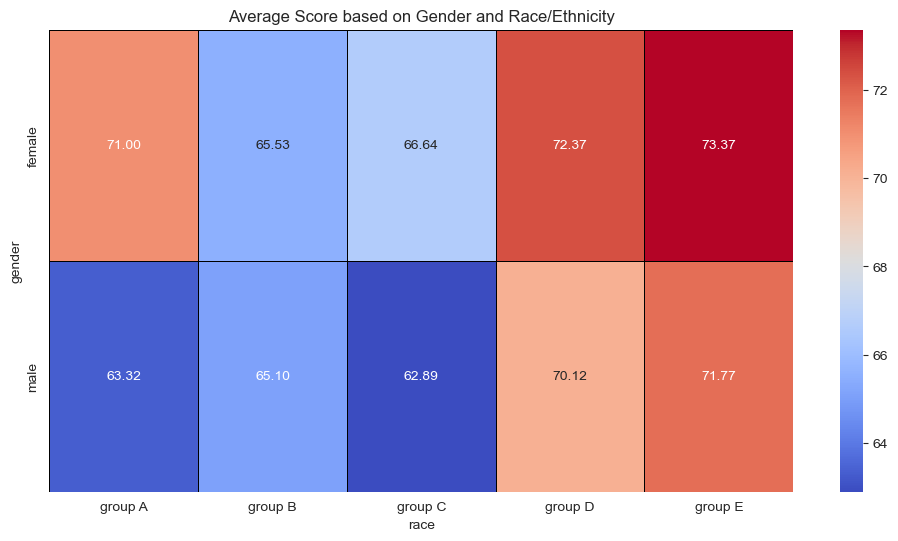

In [26]:
# Grouped Analysis: Average score based on gender and race/ethnicity
grouped_data = data.groupby(['gender', 'race'])['average score'].mean().unstack()

# Plotting the grouped data
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title("Average Score based on Gender and Race/Ethnicity")
plt.show()


### Grouped Analysis: Gender and Race/Ethnicity

The heatmap depicts the average scores based on a combination of gender and race/ethnicity:

- Across most ethnic groups, female students have slightly higher average scores compared to male students. The only exception is Group E, where male students have a slightly higher average score.
- Group E consistently shows higher average scores for both genders compared to other groups.
- Group A, on the other hand, generally has the lowest average scores for both genders.

These insights further enrich our understanding of student performance and the intertwined effects of gender and race/ethnicity.


### Statistical Testing
We'll use ANOVA (Analysis of Variance) to test if the mean scores across different groups are 
tatistically different. Specifically, we'll test:

- If average scores differ significantly across different race/ethnicity groups.
- If average scores differ significantly between the two genders.
- If average scores differ significantly based on lunch type.
- If average scores differ significantly based on completion of the test preparation course.

Let's start with the race/ethnicity groups.

In [28]:
import scipy.stats as stats

# ANOVA for average scores across different race/ethnicity groups
fvalue_race, pvalue_race = stats.f_oneway(
    data['average score'][data['race'] == 'group A'],
    data['average score'][data['race'] == 'group B'],
    data['average score'][data['race'] == 'group C'],
    data['average score'][data['race'] == 'group D'],
    data['average score'][data['race'] == 'group E']
)

fvalue_race, pvalue_race

(12.74330469756053, 4.0520022190727103e-10)

For the average scores across different race/ethnicity groups:

- $( F )$-value: $12.74$
- $( p )$-value: $(4.05 \times 10^{-10})$

The $( p )$-value is extremely small, which means that the differences in average scores across the race/ethnicity groups are statistically significant.

Next, let's perform ANOVA for average scores between the two genders.

In [29]:
# ANOVA for average scores between genders
fvalue_gender, pvalue_gender = stats.f_oneway(
    data['average score'][data['gender'] == 'male'],
    data['average score'][data['gender'] == 'female']
)

fvalue_gender, pvalue_gender

(6.626818926032132, 0.010188670909791553)

For the average scores between the two genders:

- $( F )$-value: $6.63$
- $( p )$-value: $0.0102$

Given the $( p )$-value is less than the typical significance level of 0.05, we can conclude that the differences in average scores between males and females are statistically significant.

Now, let's test the average scores based on lunch type.

In [30]:
# ANOVA for average scores based on lunch type
fvalue_lunch, pvalue_lunch = stats.f_oneway(
    data['average score'][data['lunch'] == 'standard'],
    data['average score'][data['lunch'] == 'free/reduced']
)

fvalue_lunch, pvalue_lunch

(134.29175398908254, 3.184028350042113e-29)

For the average scores based on lunch type:

- $( F )$-value: $134.29$
- $( p )$-value: $3.18 \times 10^{-29}$

The $( p )$-value is extremely close to zero, indicating that the differences in average scores based on lunch type are statistically significant.

Lastly, let's test the average scores based on the completion of the test preparation course.

In [32]:
# ANOVA for average scores based on test preparation course completion
fvalue_course, pvalue_course = stats.f_oneway(
    data['average score'][data['test_prep'] == 'completed'],
    data['average score'][data['test_prep'] == 'none']
)

fvalue_course, pvalue_course


(66.369581891185, 1.1105317969276161e-15)

For the average scores based on the completion of the test preparation course:

- $( F )$-value: $66.37$
- $( p )$-value: $(1.11 \times 10^{-15})$

The extremely small $( p )$-value suggests that the differences in average scores between students who completed the test preparation course and those who didn't are statistically significant.


### Summary of Statistical Testing:

1. The differences in average scores across the race/ethnicity groups are statistically significant.
2. The differences in average scores between males and females are statistically significant.
3. The differences in average scores based on lunch type are statistically significant.
4. The differences in average scores based on the completion of the test preparation course are statistically significant.


### 2. Predictive Modeling

We'll build a predictive model to forecast the average score of a student based on the given features. For simplicity, we'll use a linear regression model. Before building the model, we need to process the categorical variables using one-hot encoding and split the data into training and testing sets.


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding categorical variables
categorical_cols = ['gender', 'race', 'parent_education', 'lunch', 'test_prep']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Splitting data into training and testing sets
X = data_encoded.drop(['math score', 'reading score', 'writing score', 'average score'], axis=1)
y = data_encoded['average score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(154.51963406210035, 0.25641512972844527)

## Predictive Modeling Results:

- **Mean Squared Error (MSE)**: 154.52
  - This metric represents the average squared difference between the observed actual outcomes and the predicted outcomes. A lower MSE indicates a better fit of the model to the data.
  
- **R-squared $( R^2 )$**: 0.2564
  - This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An $( R^2 )$ value of 0.2564 means that approximately 25.64% of the variability in the average scores can be explained by our model.

While our simple linear regression model provides some insights, there's ample room for improvement. More complex models, feature engineering, and feature selection techniques could enhance the model's performance.


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Training the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculating metrics for Gradient Boosting Regressor
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, mae_gb, r2_gb


(166.22902343961536, 10.367943897673186, 0.20006679034693098)

The Gradient Boosting Regressor results are as follows:

- **Mean Squared Error (MSE)**: 166.23
- **Mean Absolute Error (MAE)**: 10.37
- **R-squared $( R^2 )$**: 0.2001

The $ R^2 $ value of 0.2001 means that approximately 20.01% of the variability in the average scores can be explained by our model.

Next, let's proceed with the Random Forest Regressor and compare its performance with the Gradient Boosting Regressor.


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Training the Random Forest Regressor
rf_model_advanced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_advanced.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model_advanced.predict(X_test)

# Calculating metrics for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, mae_rf, r2_rf

(185.34482983600165, 11.042687036151968, 0.10807702797355867)

The Random Forest Regressor results are as follows:

- **Mean Squared Error (MSE)**: 185.34
- **Mean Absolute Error (MAE)**: 11.04
- **R-squared $( R^2 )$**: 0.1081

The $ R^2 $ value of 0.1081 means that approximately 10.81% of the variability in the average scores can be explained by our model.


### Model Comparison:
Comparing the two advanced models:

1. **Gradient Boosting Regressor**:
   - $ R^2 $: 0.2001
   - MSE: 166.23
   - MAE: 10.37
   
2. **Random Forest Regressor**:
   - $ R^2 $: 0.1081
   - MSE: 185.34
   - MAE: 11.04

The Gradient Boosting Regressor has a higher $ R^2 $ value and lower errors, making it the better model among the two for this dataset.



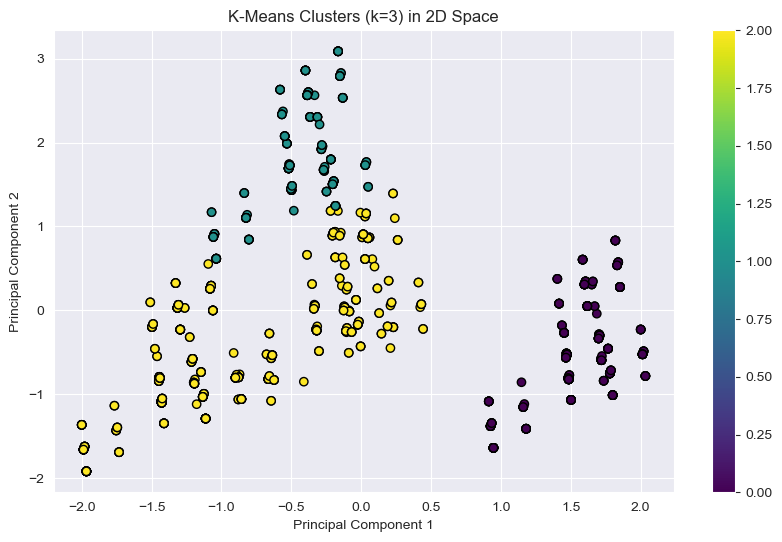

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Encoding categorical columns
categorical_cols = ['gender', 'race', 'parent_education', 'lunch', 'test_prep']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Calculating the average score
data_encoded['average score'] = data_encoded[['math score', 'reading score', 'writing score']].mean(axis=1)

# Scaling the data for clustering
scaler = StandardScaler()
data_scaled_for_clustering = scaler.fit_transform(data_encoded.drop(['math score', 'reading score', 'writing score', 'average score'], axis=1))

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled_for_clustering)

# Reducing dimensionality using PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled_for_clustering)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (k=3) in 2D Space')
plt.colorbar()
plt.show()


### Clustering

1. **Cluster Separation**: The clusters are well-separated, indicating distinct groupings in the data. This suggests that K-means clustering was able to identify meaningful patterns.
2. **Cluster Sizes**: The sizes of the clusters vary, with one of the clusters appearing larger and more spread than the others. This could suggest that there are fewer data points that belong to this particular group or that the variance within this group is larger.


In [45]:
# Adding the cluster labels back to the original dataset for profiling
data_encoded['Cluster'] = clusters

# Grouping data by clusters and calculating mean to understand the characteristics of each cluster
cluster_profile = data_encoded.groupby('Cluster').mean()
print(cluster_profile[['math score', 'reading score', 'writing score', 'average score']])

         math score  reading score  writing score  average score
Cluster                                                         
0         63.130031      66.383901      64.523220      64.679051
1         63.170732      67.102439      65.736585      65.336585
2         70.031780      71.618644      70.807203      70.819209


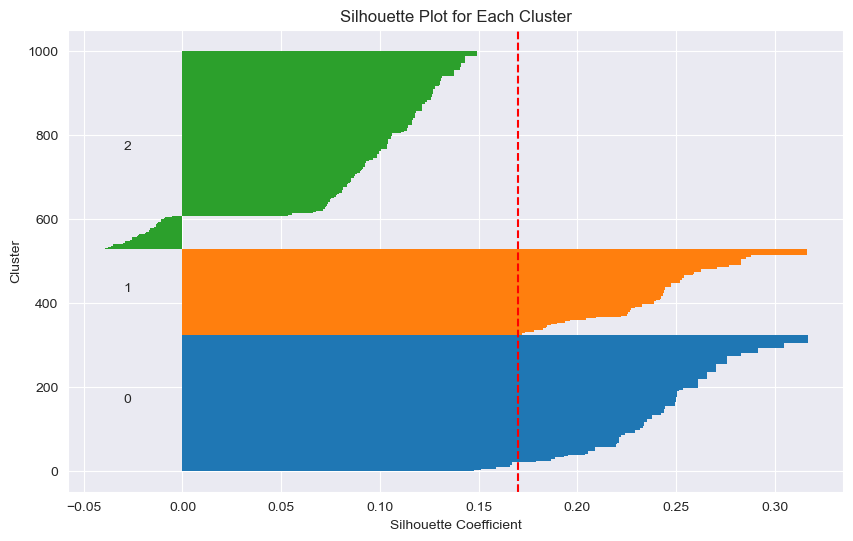

In [49]:
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(data_scaled_for_clustering, clusters)

# Plotting silhouette values for each data point
plt.figure(figsize=(10, 6))
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(clusters)):
    cluster_silhouette_values = silhouette_values[clusters == cluster]
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_values, edgecolor='none', height=1)
    plt.text(-0.03, (y_lower + y_upper) / 2, str(i))
    y_lower += len(cluster_silhouette_values)

plt.axvline(np.mean(silhouette_values), color='red', linestyle='--')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title('Silhouette Plot for Each Cluster')
plt.show()

### Interpretation of Silhouette Score:

The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where:

- A **high value** indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a value **close to 1**, then the clustering configuration is appropriate.
- If many points have a value **close to 0**, then the clustering configuration might have too many or too few clusters.
- A value **below 0** indicates that the object might be better matched to a neighboring cluster.

Given the average silhouette score of $0.1698$:

- The score is closer to 0 than to 1, which suggests that the data points might be situated quite close to the decision boundaries of the clusters.
- The clusters might be overlapping, and the distinction between clusters is not very clear-cut.
- It may be beneficial to experiment with a different number of clusters or try different clustering algorithms to see if the score improves.
